In [80]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [81]:
#Original loop used to read in data

#years=np.arange(1958,2019)
#dsets=[]
#for year in years:
    #ds=xr.open_dataset('/data/JRA/colIrradiance/colIrradiance.JRA-55.daily.grid2-intp2.'+str('%i' %year)+'.nc')
    #dsets.append(ds)
#ds=xr.concat(dsets,dim='initial_time0_hours')

#ds=ds.rename({'initial_time0_hours':'time'})
#ds['time']=pd.date_range(start='01/01/1958', end='12/31/2018',freq='D')
#ds

In [82]:
#open column integrated heating data for tropical latitudes only
ds=xr.open_dataset('JRA-55_tropical.nc')
ds

<xarray.Dataset>
Dimensions:        (time: 22280, lat: 25, lon: 180)
Coordinates:
  * lon            (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat            (lat) float32 -24.0 -22.0 -20.0 -18.0 ... 18.0 20.0 22.0 24.0
  * time           (time) datetime64[ns] 1958-01-01 1958-01-02 ... 2018-12-31
Data variables:
    colIrradiance  (time, lat, lon) float32 ...
Attributes:
    Dataset:    JRA-55
    long_name:  Column integrated irradiance

In [83]:
climatology=xr.open_dataset('climatology2.nc')
climatology

<xarray.Dataset>
Dimensions:  (lon: 180, lat: 25, time: 1460)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) int64 -24 -22 -20 -18 -16 -14 -12 ... 12 14 16 18 20 22 24
  * time     (time) datetime64[ns] 1958-01-01 ... 1958-12-31T18:00:00
Data variables:
    climo    (time, lat, lon) float64 ...

In [84]:
#original method used to convert climatology data to 6-hourly values instead of numbered ones
#time2=pd.date_range(start='01/01/1958', end='1/01/1959',freq='6H')
#time2=time2[:-1]

In [85]:
#len(time2)
#time2[-1]

In [86]:
#climatology=xr.open_dataset('/data/JRA/colIrradiance/colIrradiance.climo.grid2-intp2.1958to2018.nc')
#climatology['time']=time2
#climatology

In [87]:
#get daily averages and extract February 28th value to form leap year dataset
averages=climatology.groupby('time.dayofyear').mean('time')
feb28=averages.sel(dayofyear=59)
feb28

<xarray.Dataset>
Dimensions:    (lon: 180, lat: 25)
Coordinates:
  * lon        (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat        (lat) int64 -24 -22 -20 -18 -16 -14 -12 ... 12 14 16 18 20 22 24
    dayofyear  int64 59
Data variables:
    climo      (lat, lon) float64 -119.7 -123.7 -125.8 ... -45.41 -47.47 -47.77

In [88]:
#testing index to make sure it's correct
averages.dayofyear[58]

<xarray.DataArray 'dayofyear' ()>
array(59)
Coordinates:
    dayofyear  int64 59

In [89]:
#form new list for climatology that adds extra value to account for leap day
c=list(averages.climo[0:59].values)+[feb28.climo.values]+list(averages.climo[59:].values)
clima=np.array(c)
clima.shape

(366, 25, 180)

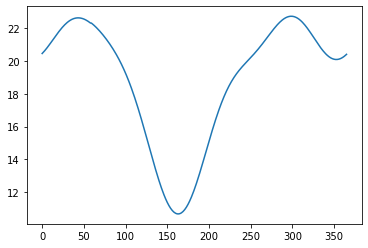

In [90]:
#make a quick plot to check
plt.plot(np.mean(clima,axis=(1,2)))

In [91]:
#form leap year array with the updated climatology as the data
lon=np.arange(0.0,360.0,2.0)
lat=np.arange(-24,25,2)
leaptime=np.arange(0,366,1)
leap=xr.DataArray(data=clima,dims=['time','lat','lon'],coords=dict(lon=lon,lat=lat,time=leaptime))
leap

<xarray.DataArray (time: 366, lat: 25, lon: 180)>
array([[[-113.66103152, -116.70737798, -118.50250611, ...,
         -105.60442328, -108.24108559, -110.66176635],
        [-118.71253881, -120.98527747, -122.24214074, ...,
         -112.24653826, -114.22341331, -116.59256543],
        [-121.84929212, -123.2081774 , -123.38981172, ...,
         -117.39897434, -118.97251269, -120.66224181],
        ...,
        [ -74.68633632,  -75.92691757,  -75.17844496, ...,
          -71.40047797,  -72.25177354,  -73.86648258],
        [ -80.41842293,  -79.62775554,  -77.91366157, ...,
          -79.39869287,  -80.26774018,  -80.65291475],
        [ -88.10732324,  -86.27197986,  -83.82708622, ...,
          -85.64265962,  -87.20714957,  -88.05489655]],

       [[-113.77882682, -116.82474365, -118.60184449, ...,
         -105.57123317, -108.30577272, -110.76435522],
        [-118.7636457 , -121.02769611, -122.25997254, ...,
         -112.25225394, -114.27368033, -116.66177782],
        [-121.82499397, -123.16122895, -123.31830979, ...,
         -117.40124296, -118.97460056, -120.65256604],
...
        [ -75.03813461,  -76.24300725,  -75.60163826, ...,
          -71.60183206,  -72.50949917,  -74.15965419],
        [ -80.75834133,  -80.00048175,  -78.28201879, ...,
          -79.63956323,  -80.522653  ,  -80.94195835],
        [ -88.48484455,  -86.64847525,  -84.15770241, ...,
          -85.93816785,  -87.49834609,  -88.38147176]],

       [[-113.53909699, -116.58694288, -118.40013559, ...,
         -105.63164933, -108.1709806 , -110.55459236],
        [-118.65758342, -120.93861319, -122.21993999, ...,
         -112.23436791, -114.16867731, -116.51956471],
        [-121.86901639, -123.25098492, -123.45839591, ...,
         -117.39209711, -118.96582481, -120.6672432 ],
        ...,
        [ -74.87272603,  -76.09741726,  -75.40182886, ...,
          -71.51071471,  -72.39058907,  -74.02315241],
        [ -80.59952751,  -79.82529207,  -78.10887058, ...,
          -79.53077407,  -80.40695923,  -80.8091715 ],
        [ -88.30890482,  -86.4721114 ,  -84.00465908, ...,
          -85.80367579,  -87.36580008,  -88.23162157]]])
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) int64 -24 -22 -20 -18 -16 -14 -12 ... 12 14 16 18 20 22 24
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365

In [92]:
#make list that combines climatology data from non-leap years and leap years using if statement
newlist=[]
for year in range(1958, 2019):
    if (( year%400 == 0)or (( year%4 == 0 ) and ( year%100 != 0))):
        newlist.append(leap.values)
    else:
        newlist.append(averages.climo.values)

In [93]:
#concatenate to get values sorted by every day spanning from 1958-2018
x=np.concatenate(newlist)
x.shape

(22280, 25, 180)

In [94]:
x

array([[[-113.66103152, -116.70737798, -118.50250611, ...,
         -105.60442328, -108.24108559, -110.66176635],
        [-118.71253881, -120.98527747, -122.24214074, ...,
         -112.24653826, -114.22341331, -116.59256543],
        [-121.84929212, -123.2081774 , -123.38981172, ...,
         -117.39897434, -118.97251269, -120.66224181],
        ...,
        [ -74.68633632,  -75.92691757,  -75.17844496, ...,
          -71.40047797,  -72.25177354,  -73.86648258],
        [ -80.41842293,  -79.62775554,  -77.91366157, ...,
          -79.39869287,  -80.26774018,  -80.65291475],
        [ -88.10732324,  -86.27197986,  -83.82708622, ...,
          -85.64265962,  -87.20714957,  -88.05489655]],

       [[-113.77882682, -116.82474365, -118.60184449, ...,
         -105.57123317, -108.30577272, -110.76435522],
        [-118.7636457 , -121.02769611, -122.25997254, ...,
         -112.25225394, -114.27368033, -116.66177782],
        [-121.82499397, -123.16122895, -123.31830979, ...,
         -117.

In [95]:
#get anomalies by subtracting concatenated array from original column irradiance values
anomalies=ds.colIrradiance - x
anomalies

<xarray.DataArray 'colIrradiance' (time: 22280, lat: 25, lon: 180)>
array([[[-2.26609594e+01, -2.10992321e+01, -9.16282287e+00, ...,
         -9.97451043e+00, -6.56868308e+00, -1.48292005e+01],
        [-2.60844888e+01, -2.03860299e+01, -7.85113624e+00, ...,
         -8.48702803e+00, -6.95358102e+00, -1.77844640e+01],
        [-2.61454894e+01, -1.54012739e+01, -4.61592558e+00, ...,
         -8.67700680e+00, -1.06222139e+01, -2.05389301e+01],
        ...,
        [ 4.07916105e+01,  3.29696880e+01,  2.64009028e+01, ...,
          3.15010601e+01,  3.26586034e+01,  3.84905022e+01],
        [ 2.62924464e+01,  2.76730284e+01,  2.88058125e+01, ...,
          1.82911527e+01,  2.11714496e+01,  2.36960018e+01],
        [ 3.62041528e+00,  2.17943531e+00,  2.56829716e+00, ...,
         -2.77395110e+00, -1.38071053e+00,  1.90704652e+00]],

       [[-1.32235688e+01, -1.37392212e+01, -9.04332763e+00, ...,
         -1.05910441e+01, -1.27152539e+01, -1.56474185e+01],
        [-1.45903124e+01, -9.37879803e+00, -2.48671630e+00, ...,
         -1.25668379e+01, -1.39499220e+01, -1.41287495e+01],
        [-9.07896721e+00, -4.51340026e+00,  5.94533921e+00, ...,
         -1.21745932e+01, -1.01137326e+01, -8.93578234e+00],
...
        [-9.21766373e+00,  5.50751836e+00,  1.36927103e+01, ...,
         -1.59149068e+01, -1.42759928e+01, -1.48633332e+01],
        [-1.55380912e+01, -1.05990666e+01, -3.06566894e-02, ...,
         -1.99846738e+01, -1.58065859e+01, -1.57713443e+01],
        [-1.38287693e+01, -1.08926472e+01, -2.58935264e+00, ...,
         -7.28076525e+00, -9.86057878e+00, -1.30796488e+01]],

       [[-7.41431792e+00, -4.74852923e+00, -4.46670859e+00, ...,
         -3.46925704e+00, -4.52432482e-01, -2.68851067e+00],
        [ 1.15230388e+00,  1.46332480e+00, -4.57847615e+00, ...,
          6.49712149e-01, -5.37232422e-01, -2.45103161e+00],
        [ 8.17155240e+00,  8.73476483e+00,  1.82799293e-01, ...,
          1.08056605e+00, -8.11445168e+00,  4.11956034e-01],
        ...,
        [ 4.28463704e+00,  1.15827536e+01,  1.59356042e+01, ...,
         -5.08518678e+00,  1.56342537e+00,  3.98974329e+00],
        [-4.92607674e+00, -3.81123594e+00, -1.35476040e-01, ...,
         -2.51041899e+01, -1.89330066e+01, -7.05111140e+00],
        [-4.47450430e+00, -6.18410046e+00, -3.97343693e+00, ...,
         -2.41309861e+01, -2.14026096e+01, -8.58491438e+00]]])
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -24.0 -22.0 -20.0 -18.0 -16.0 ... 18.0 20.0 22.0 24.0
  * time     (time) datetime64[ns] 1958-01-01 1958-01-02 ... 2018-12-31

In [96]:
#slice to get the anomalies to match up with the start date of RMM dataset
anomalies2=anomalies.sel(time=slice('06-01-1974','12/31/2018'))
anomalies2

<xarray.DataArray 'colIrradiance' (time: 16285, lat: 25, lon: 180)>
array([[[-1.00606610e+01,  6.71010432e+00,  1.58635256e+01, ...,
         -2.00591020e+01, -1.11814186e+01, -1.71006814e+01],
        [-4.92468599e+00,  9.17290267e+00,  1.60464377e+01, ...,
         -2.37629917e+01, -1.47417518e+01, -1.31443878e+01],
        [ 1.79695985e-01,  1.26720049e+01,  1.67135793e+01, ...,
         -2.07334864e+01, -1.47431054e+01, -1.11115838e+01],
        ...,
        [-4.13515880e+00, -6.44559662e+00, -1.57843479e+00, ...,
          2.45130504e+00, -8.28870165e+00, -6.62026073e+00],
        [ 1.81344673e+00,  1.43648959e+00, -6.93447130e-01, ...,
         -3.29448127e+00, -8.68145546e+00, -8.27138604e+00],
        [ 3.73963936e+00,  1.39629661e+01,  1.15105823e+01, ...,
          2.03773129e-02,  6.55159233e-02, -5.54372283e+00]],

       [[-4.91374850e+00, -6.24276183e-01, -3.91829337e+00, ...,
         -3.18409533e+01, -2.74617365e+01, -1.39141907e+01],
        [ 6.93444598e-01,  2.85831322e+00,  9.76324432e-02, ...,
         -2.89131515e+01, -2.24086509e+01, -9.08368585e+00],
        [ 5.34922886e-01,  5.12526397e+00,  4.22915406e+00, ...,
         -2.39842847e+01, -1.74778505e+01, -7.50519359e+00],
...
        [-9.21766373e+00,  5.50751836e+00,  1.36927103e+01, ...,
         -1.59149068e+01, -1.42759928e+01, -1.48633332e+01],
        [-1.55380912e+01, -1.05990666e+01, -3.06566894e-02, ...,
         -1.99846738e+01, -1.58065859e+01, -1.57713443e+01],
        [-1.38287693e+01, -1.08926472e+01, -2.58935264e+00, ...,
         -7.28076525e+00, -9.86057878e+00, -1.30796488e+01]],

       [[-7.41431792e+00, -4.74852923e+00, -4.46670859e+00, ...,
         -3.46925704e+00, -4.52432482e-01, -2.68851067e+00],
        [ 1.15230388e+00,  1.46332480e+00, -4.57847615e+00, ...,
          6.49712149e-01, -5.37232422e-01, -2.45103161e+00],
        [ 8.17155240e+00,  8.73476483e+00,  1.82799293e-01, ...,
          1.08056605e+00, -8.11445168e+00,  4.11956034e-01],
        ...,
        [ 4.28463704e+00,  1.15827536e+01,  1.59356042e+01, ...,
         -5.08518678e+00,  1.56342537e+00,  3.98974329e+00],
        [-4.92607674e+00, -3.81123594e+00, -1.35476040e-01, ...,
         -2.51041899e+01, -1.89330066e+01, -7.05111140e+00],
        [-4.47450430e+00, -6.18410046e+00, -3.97343693e+00, ...,
         -2.41309861e+01, -2.14026096e+01, -8.58491438e+00]]])
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -24.0 -22.0 -20.0 -18.0 -16.0 ... 18.0 20.0 22.0 24.0
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2018-12-31

In [97]:
#original code used to read in RMM text file and rename variables
#read_file = pd.read_csv ('/data/shared/RMM_indices.txt', sep='\s+', header=1)
#rmm=pd.DataFrame(read_file)
#rmm=rmm.to_xarray()
#rmm['phase'] = rmm['phase,']
#rmm = rmm.drop(['phase,'])
#rmm['amplitude'] = rmm['amplitude.']
#rmm = rmm.drop(['amplitude.'])
#rmm['year']=rmm['year,']
#rmm=rmm.drop(['year,'])
#rmm['day']=rmm['day,']
#rmm=rmm.drop(['day,'])
#rmm['month']=rmm['month,']
#rmm=rmm.drop(['month,'])

In [98]:
rmm=xr.open_dataset('RMM.nc')
rmm

<xarray.Dataset>
Dimensions:    (index: 17314)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 ... 17308 17309 17310 17311 17312 17313
Data variables:
    RMM1,      (index) float64 ...
    RMM2,      (index) float64 ...
    Missing    (index) object ...
    Value=     (index) float64 ...
    1.E36      (index) float64 ...
    or         (index) float64 ...
    999        (index) float64 ...
    phase      (index) int64 ...
    amplitude  (index) float64 ...
    year       (index) int64 ...
    day        (index) int64 ...
    month      (index) int64 ...

In [99]:
#rename index to time
rmm=rmm.rename({'index': 'time'})

In [100]:
#put time coord in datetime format
rmm['time']=pd.date_range(start='06/01/1974', end='10/25/2021',freq='D')

In [101]:
#cut off the edge to match the end of original dataset
rmm=rmm.sel(time=slice(None, '12-31-2018'))

In [102]:
rmm

<xarray.Dataset>
Dimensions:    (time: 16285)
Coordinates:
  * time       (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2018-12-31
Data variables:
    RMM1,      (time) float64 1.634 1.603 1.516 1.51 ... 2.616 2.265 2.011 1.842
    RMM2,      (time) float64 1.203 1.015 1.086 1.036 ... 1.08 1.096 1.346 1.666
    Missing    (time) object 'Final_value:__OLR_&_NCEP_winds' ... 'Prelim_val...
    Value=     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1.E36      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    or         (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    999        (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    phase      (time) int64 5 5 5 5 5 6 6 6 6 7 6 5 ... 5 5 5 5 5 5 5 5 5 5 5 5
    amplitude  (time) float64 2.029 1.897 1.865 1.831 ... 2.83 2.516 2.42 2.483
    year       (time) int64 1974 1974 1974 1974 1974 ... 2018 2018 2018 2018
    day        (time) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 31
    month      (time) int64 6 6 6 6 6 6 6 6 6 6 ... 12 12 12 12 12 12 12 12 12

In [103]:
#add phase as variable to anomaly dataset
anomalies2['phase']=rmm.phase

In [104]:
#add amplitude as variable to anomalies dataset
anomalies2['amplitude']=rmm.amplitude

In [105]:
anomalies2

<xarray.DataArray 'colIrradiance' (time: 16285, lat: 25, lon: 180)>
array([[[-1.00606610e+01,  6.71010432e+00,  1.58635256e+01, ...,
         -2.00591020e+01, -1.11814186e+01, -1.71006814e+01],
        [-4.92468599e+00,  9.17290267e+00,  1.60464377e+01, ...,
         -2.37629917e+01, -1.47417518e+01, -1.31443878e+01],
        [ 1.79695985e-01,  1.26720049e+01,  1.67135793e+01, ...,
         -2.07334864e+01, -1.47431054e+01, -1.11115838e+01],
        ...,
        [-4.13515880e+00, -6.44559662e+00, -1.57843479e+00, ...,
          2.45130504e+00, -8.28870165e+00, -6.62026073e+00],
        [ 1.81344673e+00,  1.43648959e+00, -6.93447130e-01, ...,
         -3.29448127e+00, -8.68145546e+00, -8.27138604e+00],
        [ 3.73963936e+00,  1.39629661e+01,  1.15105823e+01, ...,
          2.03773129e-02,  6.55159233e-02, -5.54372283e+00]],

       [[-4.91374850e+00, -6.24276183e-01, -3.91829337e+00, ...,
         -3.18409533e+01, -2.74617365e+01, -1.39141907e+01],
        [ 6.93444598e-01,  2.85831322e+00,  9.76324432e-02, ...,
         -2.89131515e+01, -2.24086509e+01, -9.08368585e+00],
        [ 5.34922886e-01,  5.12526397e+00,  4.22915406e+00, ...,
         -2.39842847e+01, -1.74778505e+01, -7.50519359e+00],
...
        [-9.21766373e+00,  5.50751836e+00,  1.36927103e+01, ...,
         -1.59149068e+01, -1.42759928e+01, -1.48633332e+01],
        [-1.55380912e+01, -1.05990666e+01, -3.06566894e-02, ...,
         -1.99846738e+01, -1.58065859e+01, -1.57713443e+01],
        [-1.38287693e+01, -1.08926472e+01, -2.58935264e+00, ...,
         -7.28076525e+00, -9.86057878e+00, -1.30796488e+01]],

       [[-7.41431792e+00, -4.74852923e+00, -4.46670859e+00, ...,
         -3.46925704e+00, -4.52432482e-01, -2.68851067e+00],
        [ 1.15230388e+00,  1.46332480e+00, -4.57847615e+00, ...,
          6.49712149e-01, -5.37232422e-01, -2.45103161e+00],
        [ 8.17155240e+00,  8.73476483e+00,  1.82799293e-01, ...,
          1.08056605e+00, -8.11445168e+00,  4.11956034e-01],
        ...,
        [ 4.28463704e+00,  1.15827536e+01,  1.59356042e+01, ...,
         -5.08518678e+00,  1.56342537e+00,  3.98974329e+00],
        [-4.92607674e+00, -3.81123594e+00, -1.35476040e-01, ...,
         -2.51041899e+01, -1.89330066e+01, -7.05111140e+00],
        [-4.47450430e+00, -6.18410046e+00, -3.97343693e+00, ...,
         -2.41309861e+01, -2.14026096e+01, -8.58491438e+00]]])
Coordinates:
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat        (lat) float32 -24.0 -22.0 -20.0 -18.0 ... 18.0 20.0 22.0 24.0
  * time       (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2018-12-31
    phase      (time) int64 5 5 5 5 5 6 6 6 6 7 6 5 ... 5 5 5 5 5 5 5 5 5 5 5 5
    amplitude  (time) float64 2.029 1.897 1.865 1.831 ... 2.83 2.516 2.42 2.483

In [106]:
#filter anomalies to values that are greater than 1
anoms=anomalies2.where(anomalies2.amplitude>1)
anoms

<xarray.DataArray 'colIrradiance' (time: 16285, lat: 25, lon: 180)>
array([[[-1.00606610e+01,  6.71010432e+00,  1.58635256e+01, ...,
         -2.00591020e+01, -1.11814186e+01, -1.71006814e+01],
        [-4.92468599e+00,  9.17290267e+00,  1.60464377e+01, ...,
         -2.37629917e+01, -1.47417518e+01, -1.31443878e+01],
        [ 1.79695985e-01,  1.26720049e+01,  1.67135793e+01, ...,
         -2.07334864e+01, -1.47431054e+01, -1.11115838e+01],
        ...,
        [-4.13515880e+00, -6.44559662e+00, -1.57843479e+00, ...,
          2.45130504e+00, -8.28870165e+00, -6.62026073e+00],
        [ 1.81344673e+00,  1.43648959e+00, -6.93447130e-01, ...,
         -3.29448127e+00, -8.68145546e+00, -8.27138604e+00],
        [ 3.73963936e+00,  1.39629661e+01,  1.15105823e+01, ...,
          2.03773129e-02,  6.55159233e-02, -5.54372283e+00]],

       [[-4.91374850e+00, -6.24276183e-01, -3.91829337e+00, ...,
         -3.18409533e+01, -2.74617365e+01, -1.39141907e+01],
        [ 6.93444598e-01,  2.85831322e+00,  9.76324432e-02, ...,
         -2.89131515e+01, -2.24086509e+01, -9.08368585e+00],
        [ 5.34922886e-01,  5.12526397e+00,  4.22915406e+00, ...,
         -2.39842847e+01, -1.74778505e+01, -7.50519359e+00],
...
        [-9.21766373e+00,  5.50751836e+00,  1.36927103e+01, ...,
         -1.59149068e+01, -1.42759928e+01, -1.48633332e+01],
        [-1.55380912e+01, -1.05990666e+01, -3.06566894e-02, ...,
         -1.99846738e+01, -1.58065859e+01, -1.57713443e+01],
        [-1.38287693e+01, -1.08926472e+01, -2.58935264e+00, ...,
         -7.28076525e+00, -9.86057878e+00, -1.30796488e+01]],

       [[-7.41431792e+00, -4.74852923e+00, -4.46670859e+00, ...,
         -3.46925704e+00, -4.52432482e-01, -2.68851067e+00],
        [ 1.15230388e+00,  1.46332480e+00, -4.57847615e+00, ...,
          6.49712149e-01, -5.37232422e-01, -2.45103161e+00],
        [ 8.17155240e+00,  8.73476483e+00,  1.82799293e-01, ...,
          1.08056605e+00, -8.11445168e+00,  4.11956034e-01],
        ...,
        [ 4.28463704e+00,  1.15827536e+01,  1.59356042e+01, ...,
         -5.08518678e+00,  1.56342537e+00,  3.98974329e+00],
        [-4.92607674e+00, -3.81123594e+00, -1.35476040e-01, ...,
         -2.51041899e+01, -1.89330066e+01, -7.05111140e+00],
        [-4.47450430e+00, -6.18410046e+00, -3.97343693e+00, ...,
         -2.41309861e+01, -2.14026096e+01, -8.58491438e+00]]])
Coordinates:
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat        (lat) float32 -24.0 -22.0 -20.0 -18.0 ... 18.0 20.0 22.0 24.0
  * time       (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2018-12-31
    phase      (time) int64 5 5 5 5 5 6 6 6 6 7 6 5 ... 5 5 5 5 5 5 5 5 5 5 5 5
    amplitude  (time) float64 2.029 1.897 1.865 1.831 ... 2.83 2.516 2.42 2.483

In [107]:
#mask 999 values so they don't get grouped into one of the 8 phases, group values with amp>1 by phase
phase_masked = anoms.phase.where(anoms.phase != 999)
anomalies_masked= anoms.where(anoms.phase != 999.0)
anomalies_masked=anomalies_masked.where((rmm.month>10) | (rmm.month<4))
grouped3=anomalies_masked.groupby(phase_masked).mean()

In [108]:
grouped3

<xarray.DataArray 'colIrradiance' (phase: 8, lat: 25, lon: 180)>
array([[[ 7.57638459e-01,  1.18288886e+00,  9.62556665e-01, ...,
          5.62906451e-01, -1.52713218e-01, -2.99139757e-01],
        [ 7.13955103e-01,  6.42975393e-01,  9.33094882e-01, ...,
         -5.51065419e-01,  8.98238774e-02,  3.99629402e-01],
        [ 4.75584812e-01,  1.10718293e+00,  1.31610645e+00, ...,
          1.47975195e+00,  9.32338719e-01,  5.55184615e-01],
        ...,
        [ 2.03693888e+00,  2.42998851e+00,  3.16641077e+00, ...,
          2.92848139e+00,  2.96856391e+00,  2.84378296e+00],
        [ 1.04781213e+00,  1.34123288e+00,  2.00589939e+00, ...,
          2.06275571e+00,  2.20968088e+00,  1.60991367e+00],
        [ 4.86861502e-01, -3.12630616e-01,  3.06438318e-01, ...,
          1.44120072e+00,  2.43418086e+00,  1.80679301e+00]],

       [[-1.79623588e-01, -3.21157436e-03,  3.96318008e-02, ...,
         -1.08334276e+00, -9.74458283e-01, -4.03664157e-01],
        [-2.05829478e-01,  3.25990565e-02, -2.66326639e-01, ...,
         -8.32651375e-01, -3.50506858e-01, -2.82987926e-01],
        [ 2.93200759e-01,  2.98393747e-01,  4.15750733e-02, ...,
         -6.27275374e-01,  4.41266673e-02,  7.21268519e-02],
...
        [ 6.58346065e+00,  6.25136682e+00,  6.05165930e+00, ...,
          7.49199741e+00,  7.05584607e+00,  7.02982096e+00],
        [ 5.46091228e+00,  5.18848779e+00,  5.48131554e+00, ...,
          6.15370437e+00,  5.79461790e+00,  5.61781866e+00],
        [ 4.22491003e+00,  3.63564777e+00,  3.06199957e+00, ...,
          4.66899137e+00,  4.69043621e+00,  4.23063758e+00]],

       [[ 1.52398422e+00,  1.48062687e+00,  1.26964637e+00, ...,
          3.81832245e+00,  3.91117810e+00,  2.26928046e+00],
        [ 1.49348638e+00,  1.61747120e+00,  1.46522186e+00, ...,
          2.70238664e+00,  2.01788855e+00,  2.05078186e+00],
        [ 1.44468978e+00,  1.15352489e+00,  8.60641628e-01, ...,
          2.59634477e+00,  1.88340025e+00,  1.52506674e+00],
        ...,
        [ 8.08039919e+00,  7.67176925e+00,  6.70294675e+00, ...,
          7.00499728e+00,  8.19412247e+00,  7.92342695e+00],
        [ 7.49643007e+00,  7.63310061e+00,  6.65981319e+00, ...,
          5.72666950e+00,  6.43099589e+00,  6.96123385e+00],
        [ 6.26706824e+00,  9.38567071e+00,  8.50480521e+00, ...,
          5.10819081e+00,  5.06028026e+00,  5.19623161e+00]]])
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 -24.0 -22.0 -20.0 -18.0 -16.0 ... 18.0 20.0 22.0 24.0
  * phase    (phase) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0

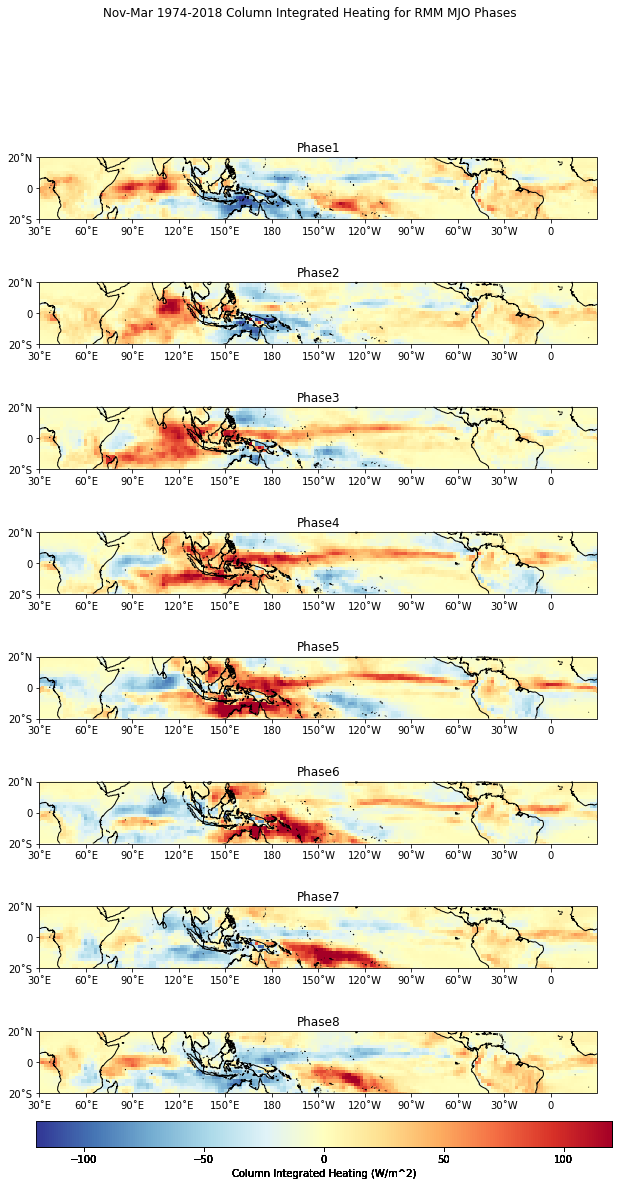

In [109]:
fig, ax= plt.subplots(8, 1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},figsize=(10,18))
ax = ax.flatten()
fig.suptitle('Nov-Mar 1974-2018 Column Integrated Heating for RMM MJO Phases')
for i in range(0,8):
    plot=ax[i].pcolormesh(grouped3.lon,grouped3.lat,grouped3[i],transform=ccrs.PlateCarree(),
                          cmap=plt.cm.RdYlBu_r,vmin=-120,vmax=120)
    ax[i].coastlines()
    ax[i].set_yticks(np.arange(-20,21,20))
    ax[i].set_yticklabels(['20˚S','0','20˚N'])
    ax[i].set_xticks(np.arange(-180,180,30))
    ax[i].set_xticklabels(['30˚E','60˚E','90˚E','120˚E','150˚E','180','150˚W','120˚W','90˚W','60˚W','30˚W','0'])
    ax[i].set_ylim([-20,20])
    ax[i].set_title('Phase'+str(i+1))
    cax=fig.add_axes([0.12,0.1,0.8,0.02])   
    cbar=plt.colorbar(plot,cax=cax,orientation='horizontal')
    cbar.set_label('Column Integrated Heating (W/m^2)')
